# Time-domain ODMR measurement

![frequency-shceduling](./figure/time-scheduling.jpg)


Import necessary modules and functions firstly

In [1]:
import matplotlib.pyplot as plt
from odmactor.scheduler import RamseyScheduler, RabiScheduler, RelaxationScheduler
from odmactor.utils.plotting import plot_ramsey, plot_rabi, plot_t1
import scipy.constants as C
import numpy as np


## Ramsey detection

**1. Set measurement parameters**
- number of readout operation $N$ per frequency measurement point
- delay time range for scanning modes, i.e., `[t_start, t_end, t_step]`, unit: "ns"
- calibrated MW $\pi$ pulse parameters, i.e., frequency (unit: Hz), power (unit: dBm) and time (unit: s)
- laser initialization time $t_{init}$, signal readout pulse time $t_{sig}$, etc.
- optional parameters: MW power $p$, if designed, the time of built-in MW $\pi$ pulse will be regulated correspondingly
- time bin $t$ per readout operation will be calculated dynamically when running the scheduler on scanning-time mode

In [121]:

t_start = 40
t_end = 7000
t_step = 30

pi_power = 12
pi_freq = 2.852 * C.giga
pi_time = 310 * C.nano

t_init = 5e3
inter_init_mw = 3e3
inter_mw_read = 200
pre_read = 50
t_read_sig = 800
# t_read_ref = t_read_sig

N = int(1e6 / 4)

**2. Construct a Ramsey Scheduler and run**

Especially, the calibrated MW $\pi$ pulse should be configured


In [122]:
scheduler = RamseyScheduler(mw_ttl=0, with_ref=True, epoch_omit=5)
scheduler.configure_mw_paras(power=pi_power, freq=pi_freq)
scheduler.pi_pulse['freq'], scheduler.pi_pulse['power'], scheduler.pi_pulse['time'] = pi_freq, pi_power, pi_time
scheduler.configure_odmr_seq(t_init, t_read_sig, inter_init_mw=inter_init_mw, inter_mw_read=inter_mw_read,
                             pre_read=pre_read, N=N)
scheduler.set_delay_times(t_start, t_end, t_step)
scheduler.configure_tagger_counting(reader='cbm')

--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 1, 'asg': 2}


In [123]:
scheduler.run_scanning()
scheduler.close()

Begin to run Ramsey Scheduler. Time intervals: 40.000 - 7000.000 ns.
N: 250000, n_times: 233
Estimated total running time: 205.04 s
MW on/off status: True
scanning freq 40.000 ns (trivial)
scanning freq 40.000 ns (trivial)
scanning freq 40.000 ns (trivial)
scanning freq 40.000 ns (trivial)
scanning freq 40.000 ns (trivial)
scanning freq 40.000 ns
scanning freq 70.000 ns
scanning freq 100.000 ns
scanning freq 130.000 ns
scanning freq 160.000 ns
scanning freq 190.000 ns
scanning freq 220.000 ns
scanning freq 250.000 ns
scanning freq 280.000 ns
scanning freq 310.000 ns
scanning freq 340.000 ns
scanning freq 370.000 ns
scanning freq 400.000 ns
scanning freq 430.000 ns
scanning freq 460.000 ns
scanning freq 490.000 ns
scanning freq 520.000 ns
scanning freq 550.000 ns
scanning freq 580.000 ns
scanning freq 610.000 ns
scanning freq 640.000 ns
scanning freq 670.000 ns
scanning freq 700.000 ns
scanning freq 730.000 ns
scanning freq 760.000 ns
scanning freq 790.000 ns
scanning freq 820.000 ns
sc

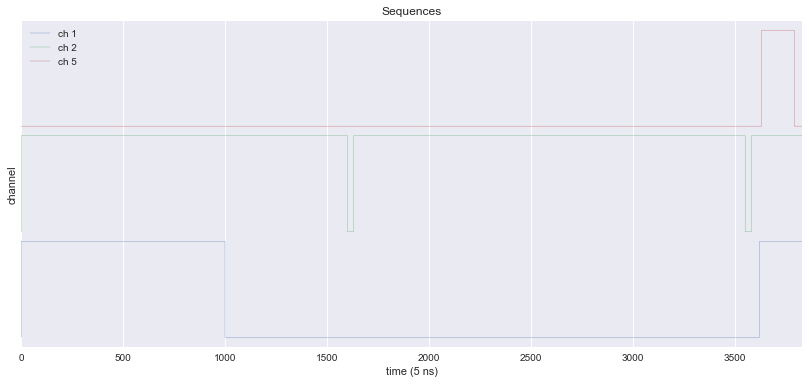

In [124]:
# observe detection sequence
scheduler._gene_pseudo_detect_seq()
fig = scheduler.sequences_figure

**3. Calculate contrast and plot figures**

In [125]:
## count & contrast
counts_sig_ref = scheduler.result  # [times, counts, counts_ref]
contrast = [sig / ref for sig, ref in zip(counts_sig_ref[1], counts_sig_ref[2])]
contrast_2 = [abs(sig - ref) / ref for sig, ref in zip(counts_sig_ref[1], counts_sig_ref[2])]


Text(0, 0.5, 'Count')

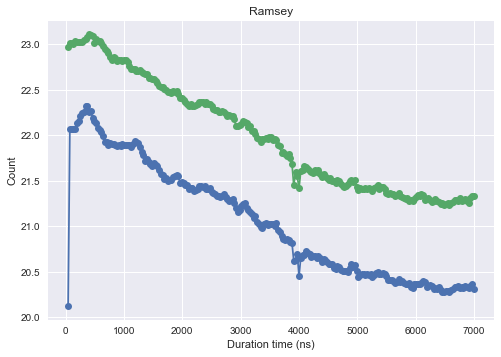

In [126]:
# plot_ramsey(counts_sig_ref[0], contrast)

plt.style.use('seaborn')
plt.plot(counts_sig_ref[0], counts_sig_ref[1], 'o-')
plt.plot(counts_sig_ref[0], counts_sig_ref[2], 'o-')
plt.title('Ramsey')
plt.xlabel('Duration time (ns)')
plt.ylabel('Count')


Text(0.5, 1.0, 'Ramsey')

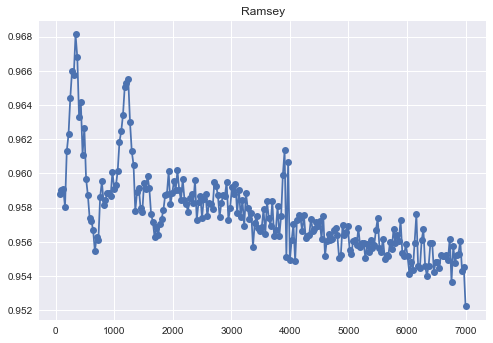

In [127]:
plt.plot(counts_sig_ref[0][1:], contrast[1:], 'o-')
plt.title('Ramsey')

Text(0.5, 1.0, 'Ramsey contrast')

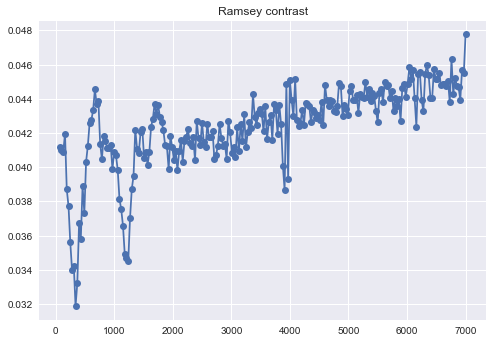

In [128]:
plt.plot(counts_sig_ref[0][1:], contrast_2[1:], 'o-')
plt.title('Ramsey contrast')

In [129]:
np.savetxt('ramsey_2.852ghz_310ns.txt', scheduler.result)

## Rabi oscillation

**1. Set measurement parameters**
- number of readout operation $N$ per frequency measurement point
- delay time range for scanning modes, i.e., `[t_start, t_end, t_step]`, unit: "ns"
- laser initilization time $t_{init}$, singal readout pulse time $t_{sig}$, etc.
- MW power $p$, MW frequency $f$
- time bin $t$ per readout operation will be calculated dynamically when running the scheduler on scanning-time mode

In [96]:

t_start = 20
t_end = 7000
t_step = 35

t_init = 3e3
inter_init_mw = 3000
inter_mw_read = 200

t_read_sig = 800
pre_read = 50

N = int(1e6 / 4)

p = 12
f = 2.889 * C.giga

**2. Construct a Rabi measurement Scheduler and run**

In [97]:
scheduler = RabiScheduler(mw_ttl=0, with_ref=True, epoch_omit=5)
scheduler.configure_mw_paras(power=p, freq=f)
scheduler.configure_odmr_seq(t_init, t_read_sig, pre_read=pre_read, inter_init_mw=inter_init_mw,
                             inter_mw_read=inter_mw_read, N=N)
scheduler.set_delay_times(t_start, t_end, t_step)
scheduler.configure_tagger_counting(reader='cbm')

# scheduler.asg_dwell

--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 1, 'asg': 2}


In [98]:
scheduler.run_scanning()

scheduler.close()

Begin to run Rabi Scheduler. Time intervals: 20.000 - 6985.000 ns.
N: 250000, n_times: 200
Estimated total running time: 175.13 s
MW on/off status: True
scanning freq 20.000 ns (trivial)
scanning freq 20.000 ns (trivial)
scanning freq 20.000 ns (trivial)
scanning freq 20.000 ns (trivial)
scanning freq 20.000 ns (trivial)
scanning freq 20.000 ns
scanning freq 55.000 ns
scanning freq 90.000 ns
scanning freq 125.000 ns
scanning freq 160.000 ns
scanning freq 195.000 ns
scanning freq 230.000 ns
scanning freq 265.000 ns
scanning freq 300.000 ns
scanning freq 335.000 ns
scanning freq 370.000 ns
scanning freq 405.000 ns
scanning freq 440.000 ns
scanning freq 475.000 ns
scanning freq 510.000 ns
scanning freq 545.000 ns
scanning freq 580.000 ns
scanning freq 615.000 ns
scanning freq 650.000 ns
scanning freq 685.000 ns
scanning freq 720.000 ns
scanning freq 755.000 ns
scanning freq 790.000 ns
scanning freq 825.000 ns
scanning freq 860.000 ns
scanning freq 895.000 ns
scanning freq 930.000 ns
scann

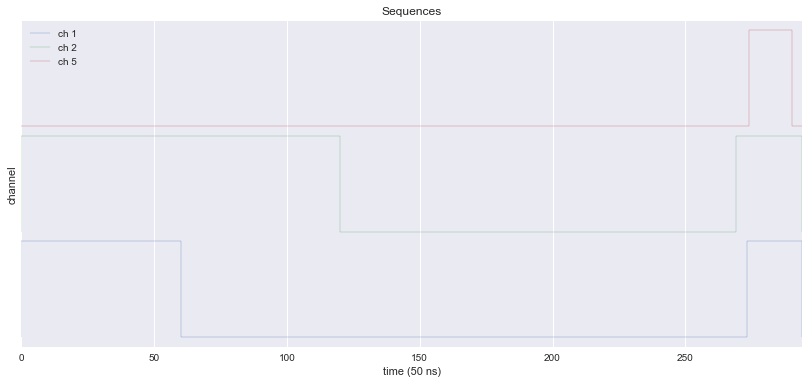

In [53]:
scheduler._gene_pseudo_detect_seq()
fig = scheduler.sequences_figure

**3. Calculate contrast and plot figures**

In [103]:
## count & contrast
counts_sig_ref = scheduler.result  # [times, counts, counts_ref]
contrast = [sig / ref for sig, ref in zip(counts_sig_ref[1], counts_sig_ref[2])]
contrast_2 = [abs(sig - ref) / ref for sig, ref in zip(counts_sig_ref[1], counts_sig_ref[2])]

Text(0, 0.5, 'counts')

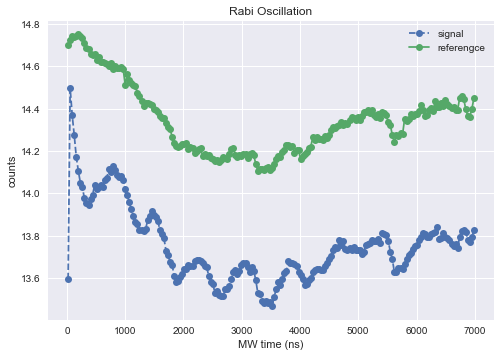

In [100]:
# plot_rabi(counts_sig_ref[0], counts_sig_ref[1])
plt.style.use('seaborn')
#plt.vlines(210, 13.6,14)
plt.plot(counts_sig_ref[0], counts_sig_ref[1], 'o--', label='signal')
plt.plot(counts_sig_ref[0], counts_sig_ref[2], 'o-', label='referengce')
plt.legend()
plt.title('Rabi Oscillation')
plt.xlabel('MW time (ns)')
plt.ylabel('counts')

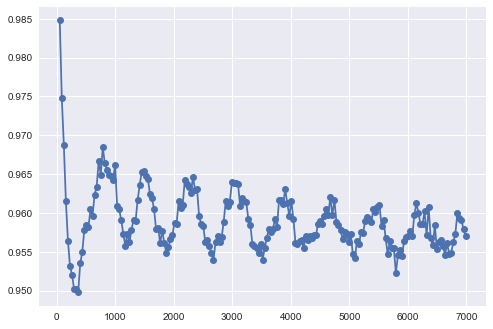

In [101]:
plt.plot(counts_sig_ref[0][1:], contrast[1:], 'o-')

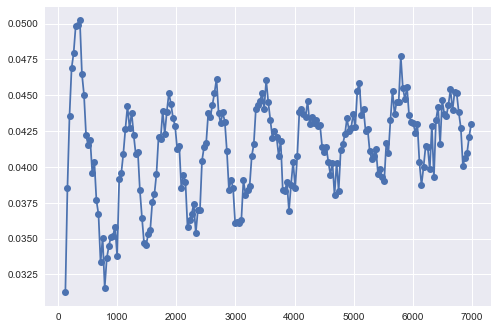

In [107]:
plt.plot(counts_sig_ref[0][3:], contrast_2[3:], 'o-')

In [102]:
np.savetxt('rabi_2.889ghz_12dbm_long_7us.txt', scheduler.result)


## T1 relaxometry

**1. Set measurement parameters**
- number of readout operation $N$ per frequency measurement point
- delay time range for scanning modes, i.e., `[t_start, t_end, t_step]`, unit: "ns"
- laser initialization time $t_{init}$, signal readout pulse time $t_{sig}$, etc.
- calibrated MW $\pi$ pulse parameters, i.e., frequency (unit: Hz), power (unit: dBm) and time (unit: s)
- optional parameters: MW power $p$, if designed, the time of built-in MW $\pi$ pulse will be regulated correspondingly
- time bin $t$ per readout operation will be calculated dynamically when running the scheduler on scanning-time mode

660.0

In [2]:

t_start = int(1e4)
t_end = int(1e6)
t_step = int(1e4)

pi_power = 10
pi_freq = 2.852 * C.giga
pi_time = 210 * C.nano

t_init = 3e3
inter_init_mw = 1e3
t_read_sig = 800
t_read_ref = t_read_sig

N = int(1e6 / 4)

times = np.round(10 ** np.linspace(1, 5, 50)) * 10



**Construct a T1 measurement scheduler and run**

In [3]:
scheduler = RelaxationScheduler(mw_ttl=0, ms=0)
scheduler.pi_pulse['freq'], scheduler.pi_pulse['power'], scheduler.pi_pulse['time'] = pi_freq, pi_power, pi_time
scheduler.configure_odmr_seq(t_init, t_read_sig, inter_init_mw=inter_init_mw, N=N)
scheduler.set_delay_times(t_start, t_end, t_step)
scheduler.set_delay_times(times=times)
scheduler.configure_tagger_counting(reader='cbm')

scheduler.ms

--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 1, 'asg': 2}


0

In [4]:
scheduler.run_scanning()
scheduler.close()


Begin to run T1 Relaxation Scheduler. Time intervals: 100.000 - 1000000.000 ns.
N: 250000, n_times: 50
Estimated total running time: 1458.83 s
MW on/off status: True
ms == 0
no two-pulse read
scanning freq 100.000 ns
ms == 0
no two-pulse read
scanning freq 120.000 ns
ms == 0
no two-pulse read
scanning freq 150.000 ns
ms == 0
no two-pulse read
scanning freq 180.000 ns
ms == 0
no two-pulse read
scanning freq 210.000 ns
ms == 0
no two-pulse read
scanning freq 260.000 ns
ms == 0
no two-pulse read
scanning freq 310.000 ns
ms == 0
no two-pulse read
scanning freq 370.000 ns
ms == 0
no two-pulse read
scanning freq 450.000 ns
ms == 0
no two-pulse read
scanning freq 540.000 ns
ms == 0
no two-pulse read
scanning freq 660.000 ns
ms == 0
no two-pulse read
scanning freq 790.000 ns
ms == 0
no two-pulse read
scanning freq 950.000 ns
ms == 0
no two-pulse read
scanning freq 1150.000 ns
ms == 0
no two-pulse read
scanning freq 1390.000 ns
ms == 0
no two-pulse read
scanning freq 1680.000 ns
ms == 0
no two-

TypeError: Object of type ndarray is not JSON serializable

In [ ]:
# observe sequence figure
fig = scheduler.sequences_figure

**3. Calculate contrast and plot figures**

In [5]:
## count & contrast
counts_sig_ref = scheduler.result  # [times, counts, counts_ref]
contrast = [sig / ref for sig, ref in zip(counts_sig_ref[1], counts_sig_ref[2])]

IndexError: list index out of range

In [6]:
plot_t1(counts_sig_ref[0], contrast)



NameError: name 'contrast' is not defined

### Hahn echo measurement

In [10]:
from odmactor.scheduler import TimeDomainScheduler
from odmactor.utils import flip_sequence
import scipy.constants as C

class HahnEchoScheduler(TimeDomainScheduler):
    def __init__(self, *args, **kwargs):
        super(HahnEchoScheduler, self).__init__(*args, **kwargs)

    def configure_odmr_seq(self, t_init, t_read_sig, inter_init_mw=3e3, inter_mw_read=200, pre_read=50,
                           inter_period=200, N=int(1e6)):
        t_mw_half_pi = self.pi_pulse['time'] / 2 / C.nano  # pi/2 pulse time duration, s --> ns
        self._cache = {
            't_init': t_init,
            't_mw_half_pi': t_mw_half_pi,
            't_read_sig': t_read_sig,
            'inter_init_mw': inter_init_mw,
            'inter_mw_read': inter_mw_read,
            'pre_read': pre_read,
            'inter_period': inter_period,
            'N': N,
        }
        self._asg_conf['N'] = N

    def _gene_detect_seq(self, t_free):
        t_init, t_mw_half_pi = self._cache['t_init'], self._cache['t_mw_half_pi']
        inter_init_mw, inter_mw_read = self._cache['inter_init_mw'], self._cache['inter_mw_read']
        t_read_sig = self._cache['t_read_sig']
        pre_read = self._cache['pre_read']
        inter_period = self._cache['inter_period']
        N = self._cache['N']

        laser_seq = [t_init, inter_init_mw + t_mw_half_pi + t_free + t_mw_half_pi * 2 + t_free + t_mw_half_pi + inter_mw_read,
                     pre_read + t_read_sig + inter_period, 0]
        mw_seq = [0, t_init + inter_init_mw, t_mw_half_pi, t_free, t_mw_half_pi * 2, t_free, t_mw_half_pi,
                  inter_mw_read + pre_read + t_read_sig + inter_period]
        tagger_seq = [0,
                      t_init + inter_init_mw + t_mw_half_pi + t_free + t_mw_half_pi * 2 + t_free + t_mw_half_pi + inter_mw_read + pre_read,
                      t_read_sig,
                      inter_period]

        if self.mw_ttl == 0:
            mw_seq = flip_sequence(mw_seq)

        self.download_asg_sequences(laser_seq, mw_seq, tagger_seq, N)


In [11]:
t_start = 40
t_end = 7000
t_step = 30

pi_power = 12
pi_freq = 2.852 * C.giga
pi_time = 310 * C.nano

t_init = 5e3
inter_init_mw = 3e3
inter_mw_read = 200
pre_read = 50
t_read_sig = 800
# t_read_ref = t_read_sig

N = int(1e6 / 4)


--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 1, 'asg': 2}


**2. Construct a Hahn echo measurement Scheduler and run**

In [ ]:
scheduler = HahnEchoScheduler(mw_ttl=0, with_ref=True)
scheduler.configure_mw_paras(power=pi_power, freq=pi_freq)
scheduler.pi_pulse['time'], scheduler.pi_pulse['freq'], scheduler.pi_pulse['power'] = pi_time, pi_freq, pi_power
scheduler.configure_odmr_seq(t_init, t_read_sig, inter_init_mw, inter_mw_read, pre_read, N=N)
scheduler.set_delay_times(t_start,t_end,t_step)
scheduler.configure_tagger_counting(reader='cbm')

In [12]:
scheduler.run_scanning()
scheduler.close()

Begin to run Time-domain ODMR Scheduler. Time intervals: 40.000 - 7000.000 ns.
N: 250000, n_times: 233
Estimated total running time: 205.04 s
MW on/off status: True
scanning freq 40.000 ns
scanning freq 70.000 ns
scanning freq 100.000 ns
scanning freq 130.000 ns
scanning freq 160.000 ns
scanning freq 190.000 ns
scanning freq 220.000 ns
scanning freq 250.000 ns
scanning freq 280.000 ns
scanning freq 310.000 ns
scanning freq 340.000 ns
scanning freq 370.000 ns
scanning freq 400.000 ns
scanning freq 430.000 ns
scanning freq 460.000 ns
scanning freq 490.000 ns
scanning freq 520.000 ns
scanning freq 550.000 ns
scanning freq 580.000 ns
scanning freq 610.000 ns
scanning freq 640.000 ns
scanning freq 670.000 ns
scanning freq 700.000 ns
scanning freq 730.000 ns
scanning freq 760.000 ns
scanning freq 790.000 ns
scanning freq 820.000 ns
scanning freq 850.000 ns
scanning freq 880.000 ns
scanning freq 910.000 ns
scanning freq 940.000 ns
scanning freq 970.000 ns
scanning freq 1000.000 ns
scanning fr

**3. Calculate contrast and plot figures**

In [14]:
counts_sig_ref = scheduler.result  # [times, counts, counts_ref]
contrast = [sig / ref for sig, ref in zip(counts_sig_ref[1], counts_sig_ref[2])]
contrast_2 = [abs(sig - ref) / ref for sig, ref in zip(counts_sig_ref[1], counts_sig_ref[2])]

Text(0, 0.5, 'counts')

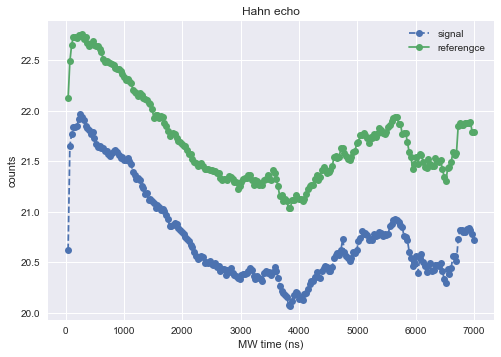

In [15]:
# plot_rabi(counts_sig_ref[0], counts_sig_ref[1])
plt.style.use('seaborn')
#plt.vlines(210, 13.6,14)
plt.plot(counts_sig_ref[0], counts_sig_ref[1], 'o--', label='signal')
plt.plot(counts_sig_ref[0], counts_sig_ref[2], 'o-', label='referengce')
plt.legend()
plt.title('Hahn echo')
plt.xlabel('MW time (ns)')
plt.ylabel('counts')

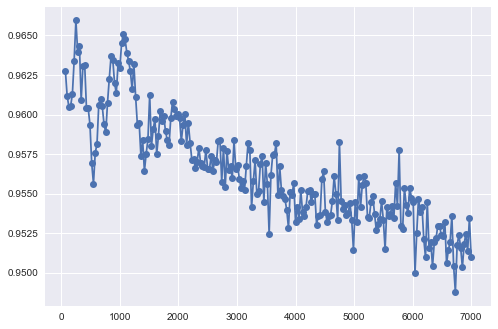

In [16]:
plt.plot(counts_sig_ref[0][1:], contrast[1:], 'o-')

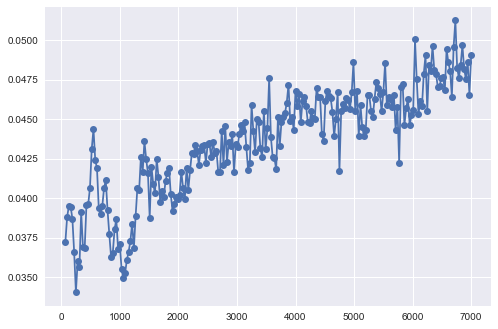

In [18]:
plt.plot(counts_sig_ref[0][1:], contrast_2[1:], 'o-')